# Рекламная кампания для магазина компьютерных игр

## Изучение общей информации о данных

In [73]:
from IPython.display import display
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd

In [74]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('games.csv')
    
display(df.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [76]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


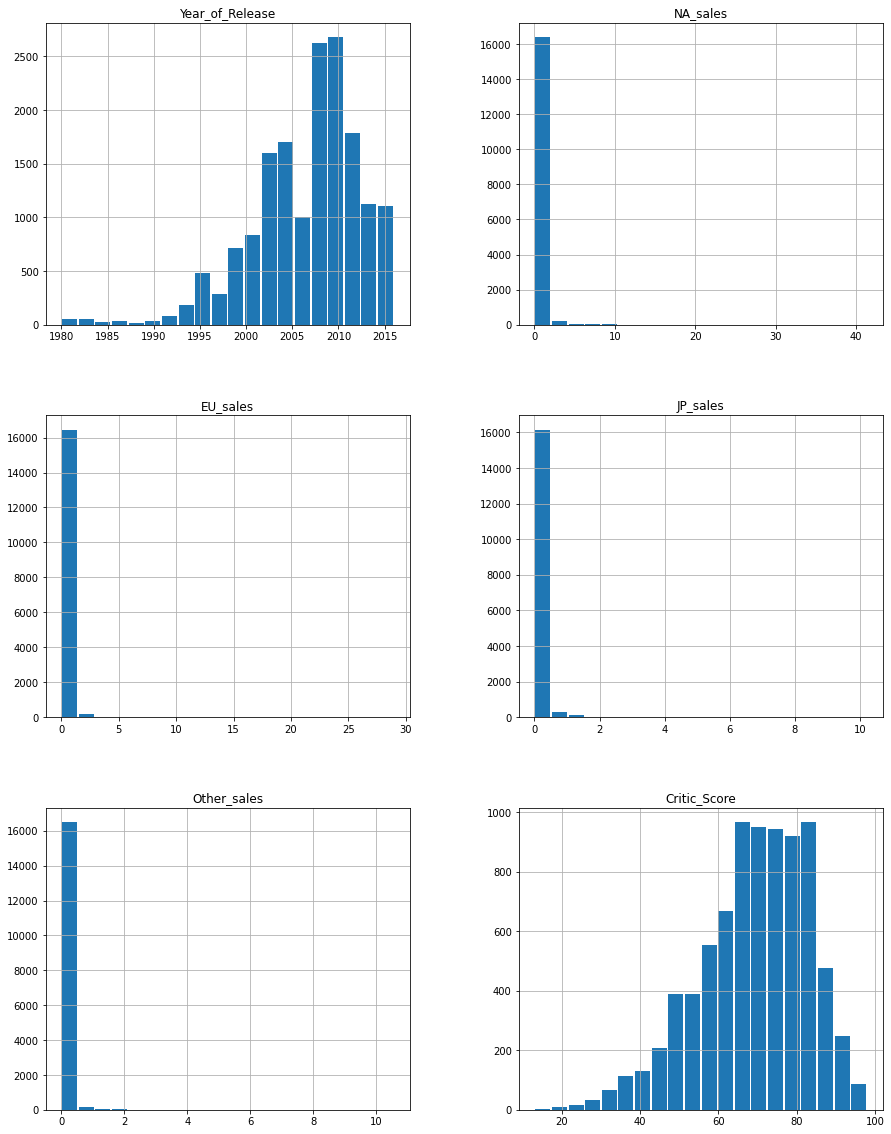

In [77]:
df.hist(figsize=(15,20), bins=20, rwidth=0.9)
plt.show()

**Вывод**: Рассмотрев массив данных, мы можем выделить этапы работы с данными:

* Привести к нижнему регистру названия столбцов
* Изменить тип данных в столбце "год выпуска", "оценка пользователей"
* Изучить явные и неявные дубликаты
* Изучить выбросы. При необходимость удалить их
* Изучить пропуски в столбцах "название игры", "оценка критиков", "оценка пользователей", "рейтинг от организации ESRB" и проч. По возможности заменить пропуски

## Подготовка данных

### Изменение названий столбцов

Чтобы было удобнее обращаться к массиву данных, приведем названия столбцов к нижнему регистру.

In [78]:
df.columns = df.columns.str.lower()
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразование типа данных

#### Переменная "год выпуска"

В столбце `year_of_release` необходимо изменить тип данных из вещественного в целочисленный формат. Для решения поставленных в исследовании задач не понадобится формат дата-время, а от вещественного формата лучше избавиться – года в таком виде не принято "хранить".

Мы не можем заменить формат предварительно не заполнив пропуски. Изучив пропущенные данные, мы пришли к выводу, что нет закономерности между пропущенным годом и названием игры, платформой или жанром (можно убедиться в этом, раскомментировав ячейки). Мы не можем восстановить пропуски исходя из данных. Изучим процент пропусков – он совсем небольшой (1,6%). Удалим пропуски

In [79]:
# df.loc[df['year_of_release'].isna() == True, 'name'].value_counts()
# df.loc[df['year_of_release'].isna() == True, 'platform'].value_counts()
# df.loc[df['year_of_release'].isna() == True, 'genre'].value_counts()

In [80]:
print('Процент пропусков ("год релиза"):', round(df['year_of_release'].isna().sum()*100/df.shape[0], 2))

Процент пропусков ("год релиза"): 1.61


In [81]:
df = df.loc[~df['year_of_release'].isna()].copy()
print('Количество пропусков ("год релиза"):', df['year_of_release'].isna().sum())

Количество пропусков ("год релиза"): 0


In [82]:
df['year_of_release'] = df['year_of_release'].astype('int')
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Переменная "оценка пользователей"

Тип данных переменной `user_score` – строковый, но исходя из содержания столбцов, он должен быть вещественным. Заметим, что значения некоторых наблюдений в этом столбце – "tbd", что означает to be defined, т.е. неопределенное пропущенное значение. Заменим "tbd" на `None`, а затем изменим формат данных на вещественный.

In [83]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = None
df['user_score'] = pd.to_numeric(df['user_score'])

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**Вывод**: Теперь формат всех данных соответсвует действительности. Можно перейти к изучению явных и неявных дубликатов.

### Удаление дубликатов

В массиве данных нет явных дубликатов. Проверим, нет ли неявных дубликатов в строковых столбцах `platform` и `genre`.

In [85]:
df.duplicated().sum()

0

In [86]:
df['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

In [87]:
df['platform'].value_counts()

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

**Вывод:** Неявных дубликатов в массиве данных также нет. Можно переходить к замене пропусков.

### Заполнение пропусков 

Из таблицы ниже видно, в каких столбцах массива есть пропуски. 

In [88]:
pd.DataFrame(df.isna().sum()).style.background_gradient('coolwarm')

,0
name,2
platform,0
year_of_release,0
genre,2
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,8463
user_score,8983


#### Переменные "имя" и "жанр"

Интересно, что для тех игр, у которых пропущено название, пропущен и жанр. Поэтому мы не можем восстановить эти данные, исходя из наблюдений в массиве. Таких пропуском немного. Предлагается удалить их.

In [89]:
df.loc[df['genre'].isna()].index == df.loc[df['name'].isna()].index

array([ True,  True])

In [90]:
df = df.loc[~df['name'].isna()].copy()
print('Количество пропусков ("название игры"):', df['name'].isna().sum())

Количество пропусков ("название игры"): 0


#### Переменная "оценка критиков"

В столбце `critic_score` мы наблюдаем пропуски (более 8,5 тыс.). При этом для большинства строк, где пропущены значения переменной "оценка критиков", также отсуствуют значения для переменных "оценка пользователей" и "рейтинг от организации ESRB", т. е. мы не сможем использовать эти данные для замены пропусков. Исключить эти данные из массива мы также не можем – они составляют около 50% всей выборки.

In [91]:
df['critic_score'].isna().sum()

8461

In [92]:
df.loc[df['critic_score'].isna(), 'user_score'].isna().sum()

7892

In [93]:
df.loc[df['critic_score'].isna(), 'rating'].isna().sum()

6595

Для начала нужно принять решение, как заменить пропуски, чтобы не удалять эти данные. Если раскомментировать код, то можно убедиться в том, что пропуски в переменной "оценка критиков" не зависит от названия игры, платформы, года выпуска или жанра. 

In [94]:
# df.loc[df['critic_score'].isna() == True, 'name'].value_counts()
# df.loc[df['critic_score'].isna() == True, 'platform'].value_counts()
# df.loc[df['critic_score'].isna() == True, 'year_of_release'].value_counts()
# df.loc[df['critic_score'].isna() == True, 'genre'].value_counts()

Из гистограммы и описательных статистик видно, что распределение переменной похоже на нормальное, данные скошены влево, выбросы не наблюдаются.

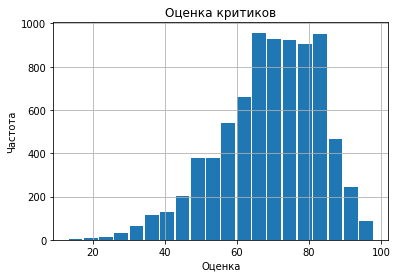

In [95]:
# визуализируем старое распределение
df['critic_score'].hist(bins=20, rwidth=0.9)
plt.title('Оценка критиков')
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.show()

In [96]:
df['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [97]:
df['critic_score'].fillna(-1, inplace = True)

**Вывод:** Мы заменили большую часть пропусков из массива данных, на заглушку (значение -1), чтобы сохранить данные. В процессе анализа и проверки гипотез отфильтруем эту заглушку.

Далее заменим значения в переменной "оценка пользователей". Для замены значений будем использовать подход, аналогичный тому, что был задействован для замены пропущенных значений в переменной "оценка критиков".

#### Переменная "оценка пользователей"

Не было выявлено никаких закономерностей между пропусками в переменной "оценка пользователей" и названием, платформой, годом релиза или жанром игры. 

In [98]:
# df.loc[df['user_score'].isna() == True, 'name'].value_counts()
# df.loc[df['user_score'].isna() == True, 'platform'].value_counts()
# df.loc[df['user_score'].isna() == True, 'year_of_release'].value_counts()
# df.loc[df['user_score'].isna() == True, 'genre'].value_counts()

Распределение переменной похоже на нормальное, скошенное влево. Чаще всего пользователи остаются довольны играми. Выбросы в данных не наблюдаются. Поскольку данные у нас пропущены не случайным образов, а также их нельзя восстановить, руководствуясь остальными данными из массива (т.к. оценка пользователя – это усредненная оценка конкретной игры, присвоенная ей и не зависящая от остальных признаков в массиве), предлагается заменить пропущенные значения на заглушку (значение -1). 

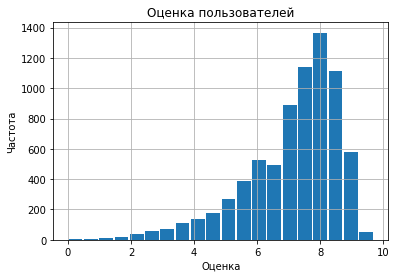

In [99]:
# визуализируем старое распределение
df['user_score'].hist(bins=20, rwidth=0.9)
plt.title('Оценка пользователей')
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.show()

In [100]:
df['user_score'].describe()

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [101]:
df['user_score'].fillna(-1, inplace = True)

**Вывод:** Мы заменили большую часть пропусков из массива данных на заглушку (значение -1).

#### Переменная "рейтинг ESRB"

Изучив пропуски в переменной "рейтинг ESRB", мы выяснили, что они не связаны с именем, платформой, годом релиза и жанром игры.

In [102]:
# df.loc[df['rating'].isna() == True, 'name'].value_counts()
# df.loc[df['rating'].isna() == True, 'platform'].value_counts()
# df.loc[df['rating'].isna() == True, 'year_of_release'].value_counts()
# df.loc[df['rating'].isna() == True, 'genre'].value_counts()

Переменная "рейтинг ESRB" – категориальная. Чаще всего игры получают оценку "E" – для всех от 6 лет. Также часто играм присваивается возрастное ограничение "T" - "подросткам", игра подходит для лиц от 13 лет. Следующая по популярности категория "M" – материалы игры не подходят для подростков младше 17 лет, далее "E10+" – для всех от 10 лет и старше. Реже всего игры получают рейтинг "AO" (только для взрослых), "K-A" (для детей и взрослых) и "RP" (рейтинг ожидается).  

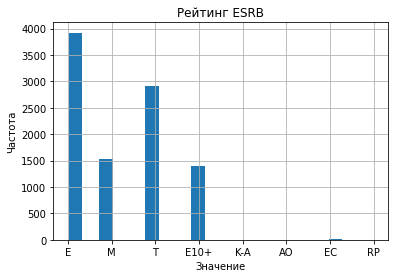

In [103]:
# визуализируем старое распределение
df['rating'].hist(bins=20, rwidth=0.9)
plt.title('Рейтинг ESRB')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

Пропуски могли появиться из-за ошибки при выгрузке данных, из-за отсутсвия данных о рейтинге в карточке игры на сайте, из-за того, что ассоциация ESRB не оценивала игру. 

Пропущенные значения предлагается заменить на "unknown", поскольку в массиве нет данных об играх, на основе которых мы могли бы установить возрастные ограничения, а также нет данных о среднем возрасте аудитории этих игр, которые также позволили нам предположить, какой мог быть потенциальный рейтинг игры.

In [104]:
df['rating'] = df['rating'].fillna('unknown')

**Вывод:** Исходя из доступных в массиве данных невозможно восстановить пропущенные значения. Чтобы не потерять большую часть данных, было принято решение заменить пропуски на значение "unknown".

In [105]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [106]:
print(f'В массиве осталось: {df.shape[0]} наблюдений.')

В массиве осталось: 16444 наблюдений.


**Вывод:** Таким образом, в ходе подготовки массива к исследовательскому анализу были изменены типы данных в столбцах `year_of_release` и `user_score`. Была реализована проверка данных на наличие явных и неявных дубликатов – выявлены не были. Были заменены пропуски в переменных `critic_score`, `user_score` на заглушку (-1). Также были удалены пропущенные значени] в переменной `year_of_release`, `name` и `genre`. В переменной `rating` пропуски были заменены на значение "unknown". Всего в массиве данных осталось более 16,4 тыс. наблюдений. В заключение рассчитаем суммарные продажи каждой игры во всех регионах.

In [107]:
df['region_sum'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
display(df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'region_sum']].head())

,na_sales,eu_sales,jp_sales,other_sales,region_sum
0,41.36,28.96,3.77,8.45,82.54
1,29.08,3.58,6.81,0.77,40.24
2,15.68,12.76,3.79,3.29,35.52
3,15.61,10.93,3.28,2.95,32.77
4,11.27,8.89,10.22,1.00,31.38


## Исследовательский анализ данных

### Изучение количества релизов за каждый год

Для того, чтобы проследить, сколько игр выпускалось в разные годы, получим сводную таблицу.

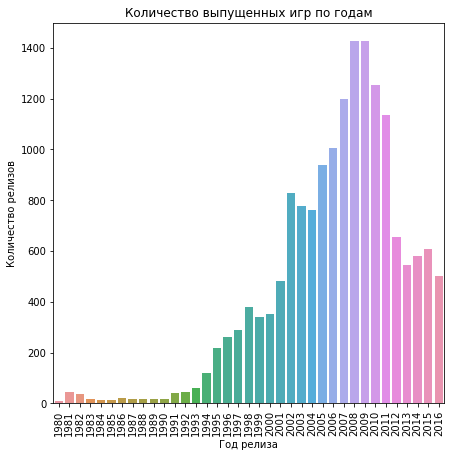

In [108]:
games_by_year = (df
                 .pivot_table(index = 'year_of_release', values = 'name', aggfunc='count')
)

plt.figure(figsize=(7,7))
sns.barplot(x=games_by_year.index, y=games_by_year['name'])
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год релиза')
plt.xticks(rotation = 90)
plt.ylabel('Количество релизов')
plt.show()

**Вывод:** Из граффика видно, что до 1995 года игры практически не выпускались. После 1995 наблюдается стремительный рост количества релизов. Большая часть игр была выпущена в 2002-2010 годах. Исходя из этого, для исследования подходит урезанная выборка – 2000-2016 гг.

### Изучение продаж по платформам

Проследим, как менялись продажи по платформам. Для начала определим платформы с наибольшими продажами. Из диаграммы следует, что платформы с наибольшими суммарными продажами – это DS, PS-PS3, Wii, X360.

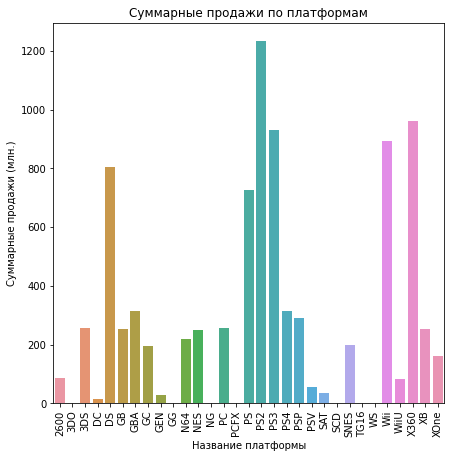

In [109]:
platform_sum = (df
                .pivot_table(index='platform', values='region_sum', aggfunc='sum')
)

plt.figure(figsize=(7,7))
sns.barplot(x=platform_sum.index, y=platform_sum['region_sum'])
plt.title('Суммарные продажи по платформам')
plt.xlabel('Название платформы')
plt.xticks(rotation = 90)
plt.ylabel('Суммарные продажи (млн.)')
plt.show()

Чтобы ответить на вопрос, за какой зарактерный срок появляются новые и исчезают старые платформы, построим распределение продаж для каждой платформы. Для начала создадим сводную таблицу, в которой соберем всё топовые платформы. 

In [110]:
top_platforms = (df
                 .query('(platform == "DS") | (platform == "PS") | (platform == "PS2") | (platform == "PS3") | (platform == "Wii") | (platform == "X360")')
                 .pivot_table(index=['platform', 'year_of_release'], values='region_sum', aggfunc='sum')
)
top_platforms.reset_index(inplace=True)
display(top_platforms.head())

,platform,year_of_release,region_sum
0,DS,1985,0.02
1,DS,2004,17.27
2,DS,2005,130.14
3,DS,2006,119.81
4,DS,2007,146.94


Из распределений ниже видно, что игры на PS хорошо продавались с 1994 по 2003 год, на PS2 – c 2000 по 2010, а на PS3 – 2006 по 2016, т. е. в среднем за 9-10 лет происходит "обновление" платформы. Платформы DS, Wii и X360 также популярны на протяжении 9-10 лет, для поддержания продаж требудется их обновление. 

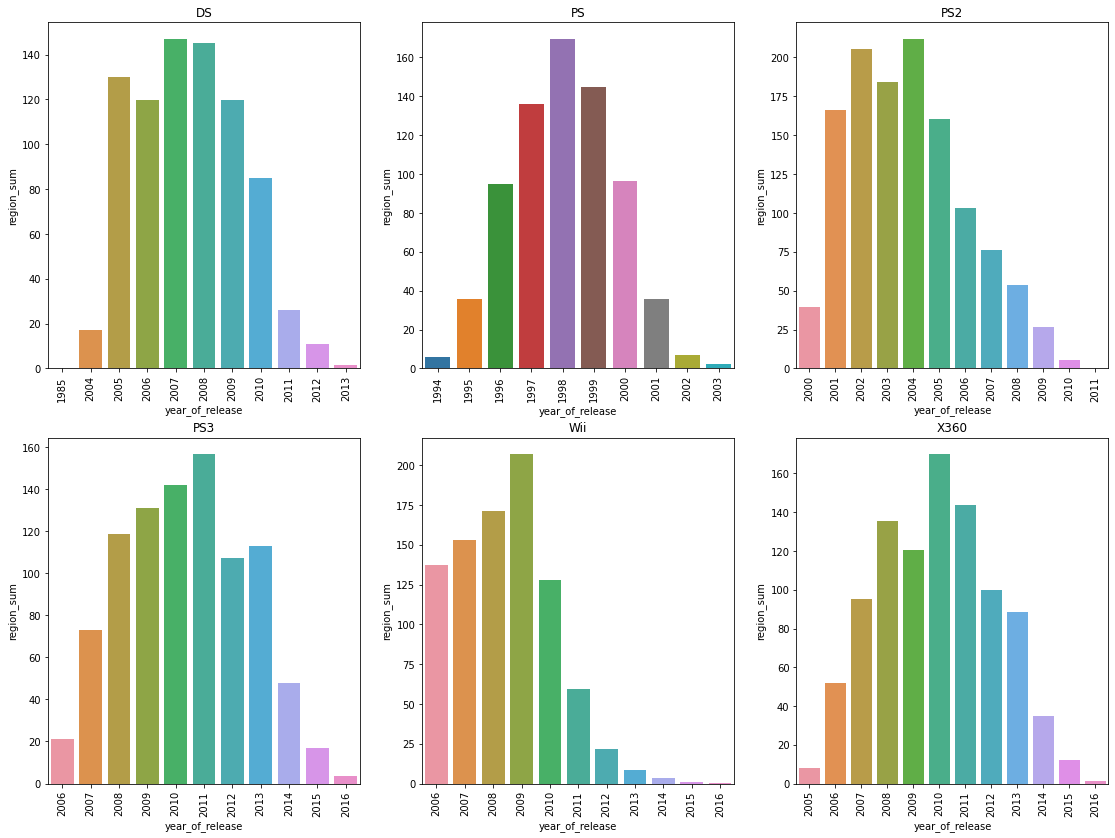

In [111]:
_, axs = plt.subplots(2, 3, figsize=(19,14))
axs = axs.ravel()
top = ['DS', 'PS', 'PS2', 'PS3', 'Wii', 'X360']

for i in range(len(top)):
    ax = axs[i]
    sns.barplot(ax=ax, x="year_of_release", y="region_sum", data=top_platforms.loc[top_platforms['platform'] == top[i]])
    ax.tick_params(axis='x', labelrotation = 90)
    ax.set_title(top[i])

Удалим выброс за 1985 год у платформы DS.

In [112]:
df = df.loc[~((df['platform'] == 'DS') & (df['year_of_release'] == 1985))]
df.loc[(df['platform'] == 'DS') & (df['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,region_sum


**Вывод:** На первом этапе мы определили, что большая часть игр была выпущена в 2002-2010 годах, поэтому было принято решение исключить из выборки игры, выпущенные ранее 2000-х. Далее мы увидели, что игровые платформы популярны на протяжении 9-10 лет. Поэтому для разработки предсказания на 2017 год лучше руководствоваться данными за последние 5 лет, т.е. с 2013 по 2016 гг. Исключив данные из выборки, руководствуясь этими критериями, мы потеряем более 6 тыс. наблюдений, но зато получим актуальный период, данные за который помогут построить прогноз на 2017 гг. 

Оставим в массиве данные только за актуальный период.

In [113]:
df = df.query('year_of_release > 2012').copy()

Лидирует по продажам за 2013-2016 гг. платформа PS4. Также высокие показатели у платформ PS3, XOne, 3DS.

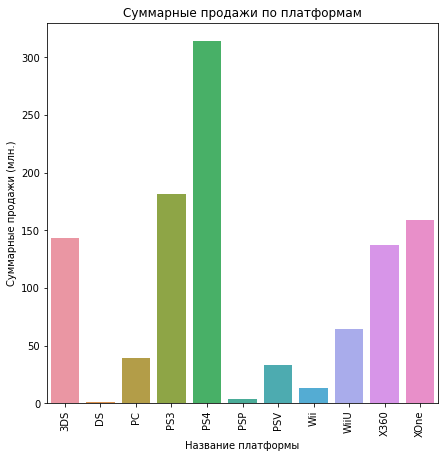

In [114]:
platform_sum = (df
                .pivot_table(index='platform', values='region_sum', aggfunc='sum')
)

plt.figure(figsize=(7,7))
sns.barplot(x=platform_sum.index, y=platform_sum['region_sum'])
plt.title('Суммарные продажи по платформам')
plt.xlabel('Название платформы')
plt.xticks(rotation = 90)
plt.ylabel('Суммарные продажи (млн.)')
plt.show()

Создадим отдельный массив данных, в котором посчитаем сумму продаж по годам для каждой из топовых платформ.

In [116]:
top_platforms2 = (df
                 .query('(platform == "3DS") | (platform == "PS3") | (platform == "PS4") | (platform == "XOne")')
                 .pivot_table(index=['platform', 'year_of_release'], values='region_sum', aggfunc='sum')
)

top_platforms2.reset_index(inplace=True)
display(top_platforms2.head())

,platform,year_of_release,region_sum
0,3DS,2013,56.57
1,3DS,2014,43.76
2,3DS,2015,27.78
3,3DS,2016,15.14
4,PS3,2013,113.25


Продажи на PS3 сокращаются сильнее, чем на платформах PS4, XOne, 3DS – рассмотрим их как потенциально прибыльные.

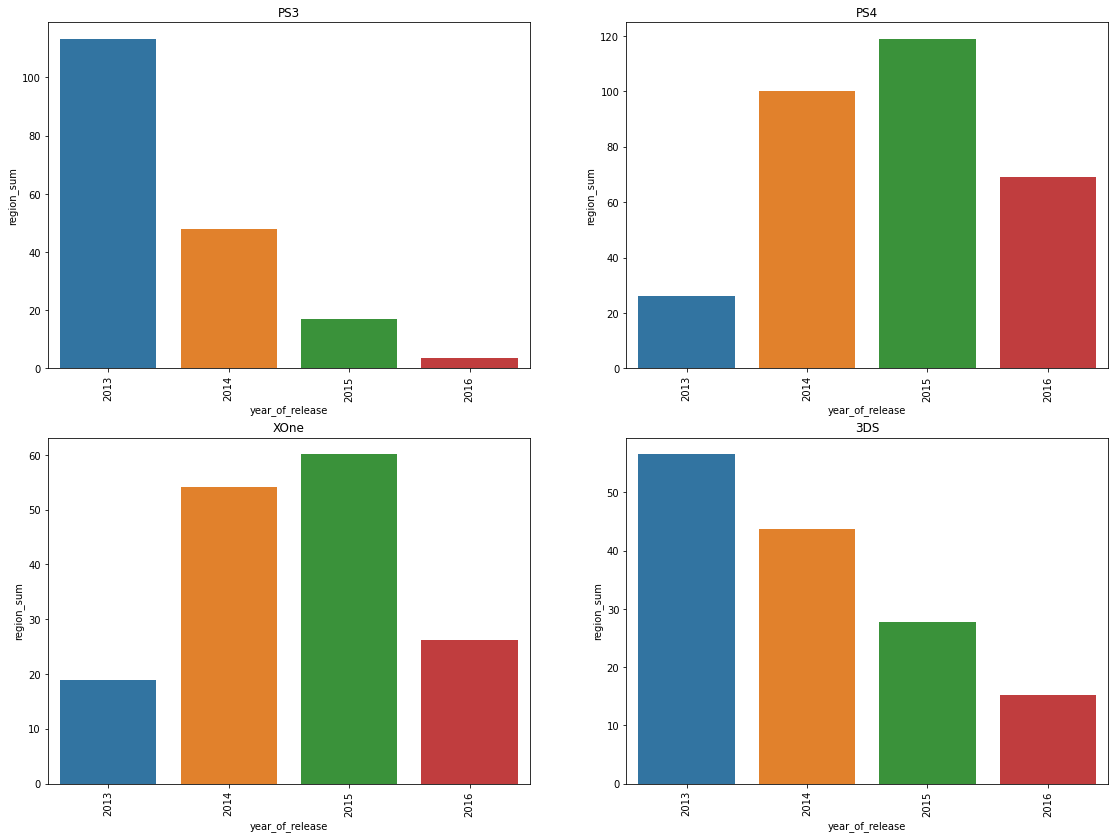

In [117]:
_, axs = plt.subplots(2, 2, figsize=(19,14))
axs = axs.ravel()
top2 = ['PS3', 'PS4', 'XOne', '3DS']

for i in range(len(top2)):
    ax = axs[i]
    sns.barplot(ax=ax, x="year_of_release", y="region_sum", data=top_platforms2.loc[top_platforms2['platform'] == top2[i]])
    ax.tick_params(axis='x', labelrotation = 90)
    ax.set_title(top2[i])

**Вывод:** В качестве потенциально прибыльных платформ можно выделить PS4, XOne, 3DS.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по разным платформам.

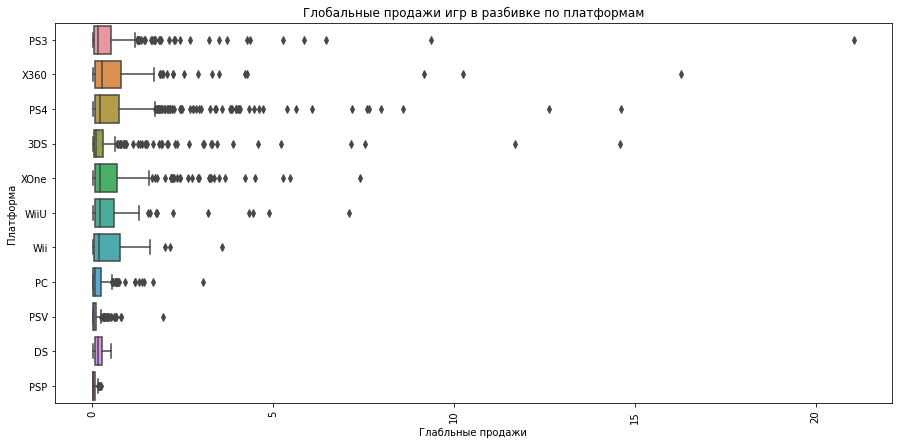

In [118]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x=df['region_sum'], y=df['platform'])
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.xlabel('Глабльные продажи')
plt.xticks(rotation = 90)
plt.ylabel('Платформа')
plt.show()

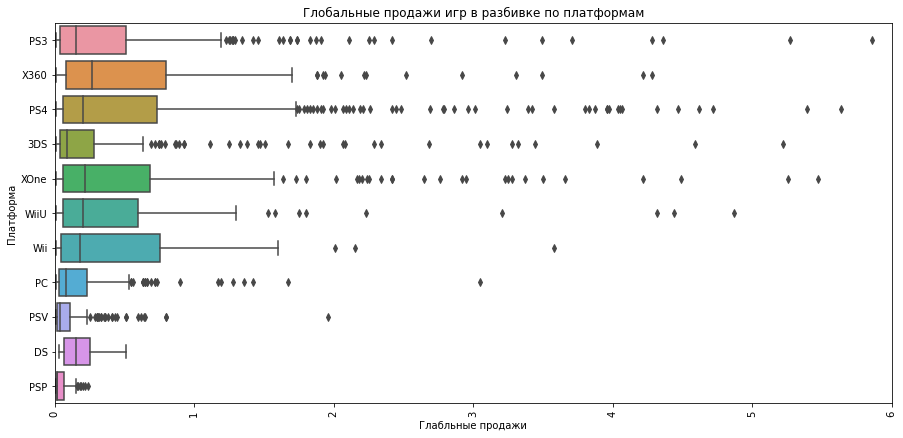

In [119]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x=df['region_sum'], y=df['platform'])
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.xlabel('Глабльные продажи')
plt.xticks(rotation = 90)
plt.xlim(0,6)
plt.ylabel('Платформа')
plt.show()

**Вывод:** Распределение переменных смещено вправо (поэтому мы видим так много значений за пределами 3 квартиля).

Посмотрим, как взаимосвязаны продажи игр на PS4 с отзывами пользователей и критиков. Для этого построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Не забудем избавиться от отрицательной заглушки.

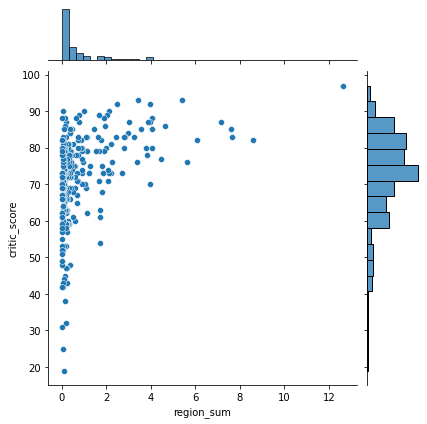

In [120]:
sns.jointplot(data=df.loc[(df['platform'] == 'PS4') & (df['critic_score'] > 0)], x='region_sum', y="critic_score")
plt.show()

In [110]:
print('Коэффициент корелляции между продажами игр и отзывами критиков:', \
      df.loc[(df['platform'] == 'PS4') & (df['critic_score'] > 0), 'region_sum'].corr(df.loc[(df['platform'] == 'PS4') & (df['critic_score'] > 0), 'critic_score']))

Коэффициент корелляции между продажами игр и отзывами критиков: 0.40656790206178145


**Вывод:** Взаимосвязь между продажами игр и отзывами критиков положительная. Сила взаимосвязи слабая (коэффициент корелляции: 0.4).

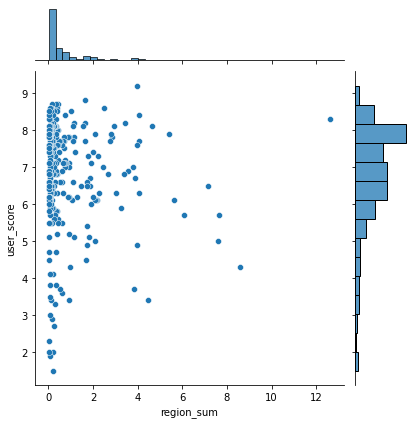

In [121]:
sns.jointplot(data=df.loc[(df['platform'] == 'PS4') & (df['user_score'] > 0)], x='region_sum', y="user_score")
plt.show()

In [112]:
print('Коэффициент корелляции между продажами игр и отзывами пользователей:', \
      df.loc[(df['platform'] == 'PS4') & (df['user_score'] > 0), 'region_sum'].corr(df.loc[(df['platform'] == 'PS4') & (df['user_score'] > 0), 'user_score']))

Коэффициент корелляции между продажами игр и отзывами пользователей: -0.031957110204556466


**Выводы:** Взаимосвязь между продажами игр и отзывами пользователей отсутсвует (значение коэффициента корелляции -0.03).

Посмотрим на взаимосвязь между продажами и оценками на платформах XOne, 3DS, WiiU, PC и XB. Сраним результаты с теми, что были получены для платформы PS4.

In [122]:
platforms_to_compare = df.query('(platform == "PS4") | (platform == "XOne") | (platform == "WiiU") | (platform == "3DS") | (platform == "PC") | (platform == "XB")')
display(platforms_to_compare.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,region_sum
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


In [123]:
plat = platforms_to_compare['platform'].unique()
platforms_to_compare2 = platforms_to_compare.query('critic_score > 0').copy()

for i in plat:
    data = platforms_to_compare2.loc[platforms_to_compare2['platform'] == i]
    print(f'Коэффициент корелляции между продажами игр на платформе {i} и отзывами критиков:', \
          data.loc[data['platform'] == i, 'region_sum'].corr(data.loc[data['platform'] == i, 'critic_score']))

Коэффициент корелляции между продажами игр на платформе PS4 и отзывами критиков: 0.40656790206178145
Коэффициент корелляции между продажами игр на платформе 3DS и отзывами критиков: 0.3570566142288104
Коэффициент корелляции между продажами игр на платформе XOne и отзывами критиков: 0.4169983280084016
Коэффициент корелляции между продажами игр на платформе WiiU и отзывами критиков: 0.3764149065423912
Коэффициент корелляции между продажами игр на платформе PC и отзывами критиков: 0.1960302829436937


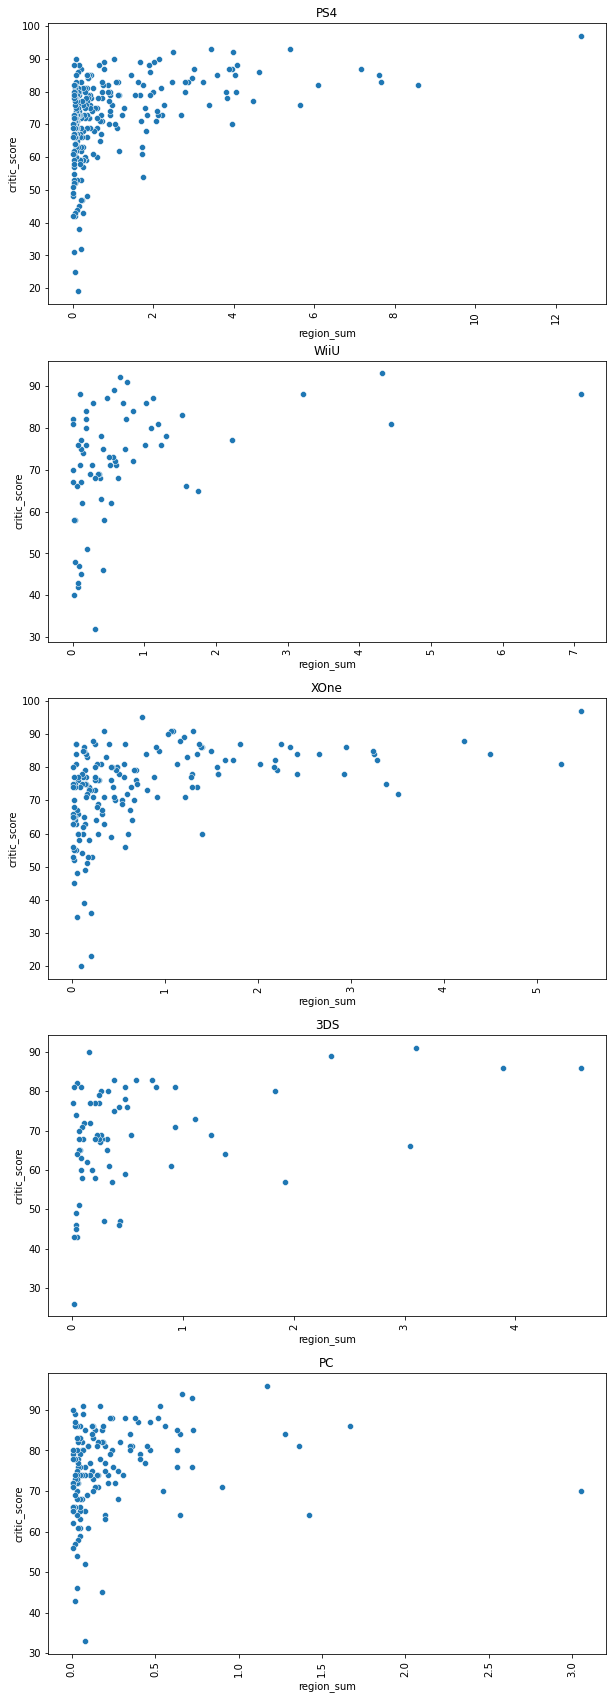

In [124]:
_, axs = plt.subplots(5, 1, figsize=(10,30))
axs = axs.ravel()
plat = platforms_to_compare2['platform'].unique()

for i in range(len(plat)):
    ax = axs[i]
    sns.scatterplot(ax=ax, data=platforms_to_compare2.loc[platforms_to_compare2['platform'] == plat[i]], x='region_sum', y="critic_score")
    ax.tick_params(axis='x', labelrotation = 90)
    ax.set_title(plat[i])

In [125]:
platforms_to_compare3 = platforms_to_compare.query('user_score > 0').copy()

for i in plat:
    data = platforms_to_compare3.loc[platforms_to_compare3['platform'] == i]
    print(f'Коэффициент корелляции между продажами игр на платформе {i} и отзывами пользователей:', \
          data.loc[data['platform'] == i, 'region_sum'].corr(data.loc[data['platform'] == i, 'user_score']))

Коэффициент корелляции между продажами игр на платформе PS4 и отзывами пользователей: -0.031957110204556466
Коэффициент корелляции между продажами игр на платформе WiiU и отзывами пользователей: 0.41933048192661837
Коэффициент корелляции между продажами игр на платформе XOne и отзывами пользователей: -0.06892505328279419
Коэффициент корелляции между продажами игр на платформе 3DS и отзывами пользователей: 0.24150411773563024
Коэффициент корелляции между продажами игр на платформе PC и отзывами пользователей: -0.09384186952476745


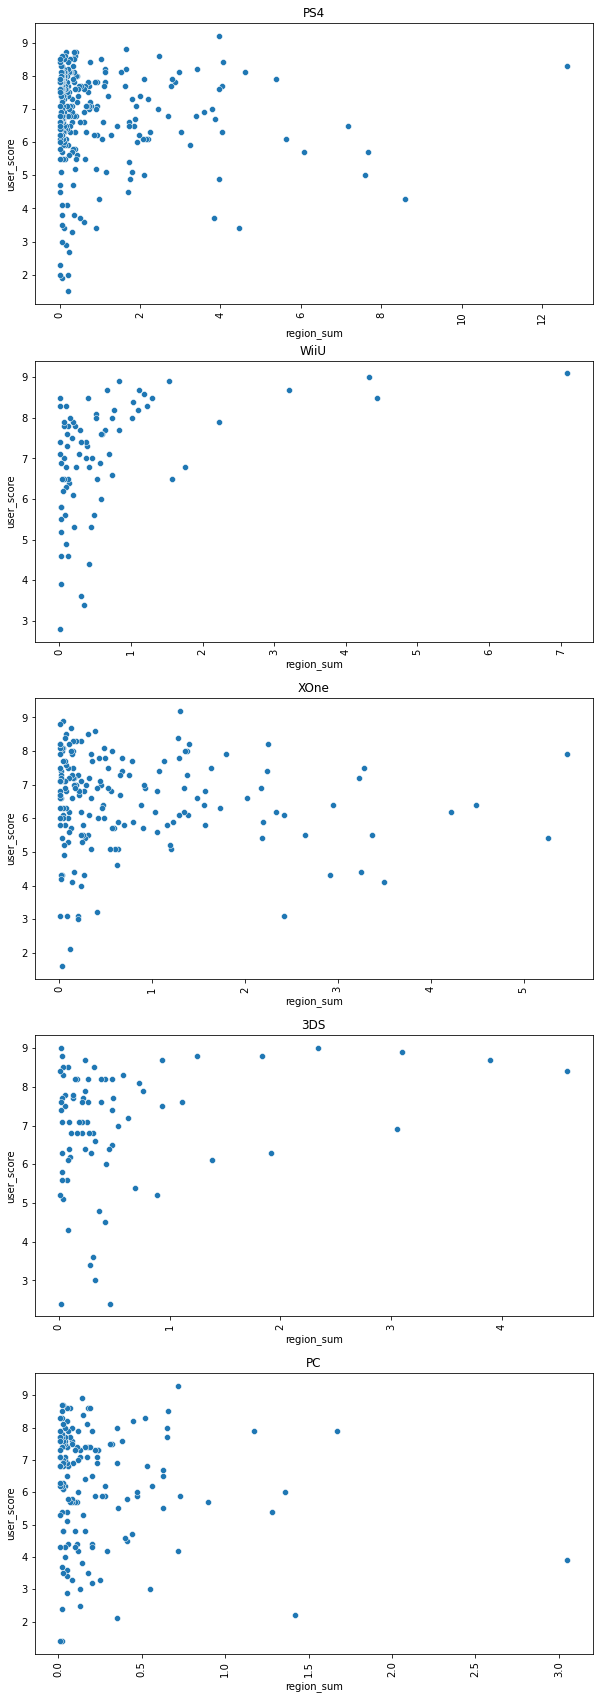

In [126]:
_, axs = plt.subplots(5, 1, figsize=(10,30))
axs = axs.ravel()
plat = platforms_to_compare3['platform'].unique()

for i in range(len(plat)):
    ax = axs[i]
    sns.scatterplot(ax=ax, data=platforms_to_compare3.loc[platforms_to_compare3['platform'] == plat[i]], x='region_sum', y="user_score")
    ax.tick_params(axis='x', labelrotation = 90)
    ax.set_title(plat[i])

**Вывод:** Характер взаимосвязи между продажами и оценками критиков положительный: чем выше оценка критиков, тем лучше продаются игры на платформах. Взаимосвязь между оценками пользователей и продажаим игр зачастую отсутсвует, слабая положительная взаиосвязь наблюдается между продажами игр на платформе WiiU и отзывами пользователей, а также между продажами игр на платформе 3DS и отзывами пользователей. Резюмируя, оценки критиков и пользователей могут быть положительно связаны с продажами, но эта связь слабая.

Изучим общее распределение игр по жанрам. Для этого получим сводную таблицу и построим столбчатые диаграммы.

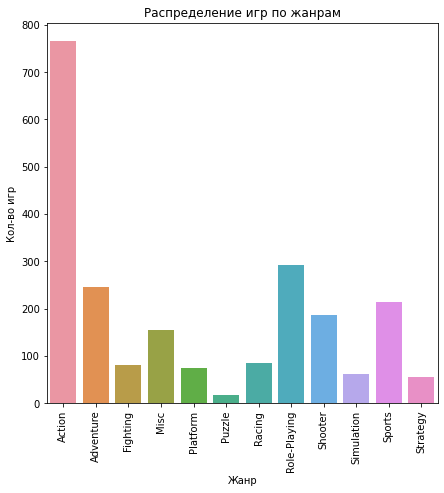

In [127]:
genre = (df
         .pivot_table(index='genre', values='name', aggfunc='count')
)

plt.figure(figsize=(7,7))
sns.barplot(x=genre.index, y=genre['name'])
plt.title('Распределение игр по жанрам')
plt.xlabel('Жанр')
plt.xticks(rotation = 90)
plt.ylabel('Кол-во игр')
plt.show()

Изучим распределение продаж по жанрам.

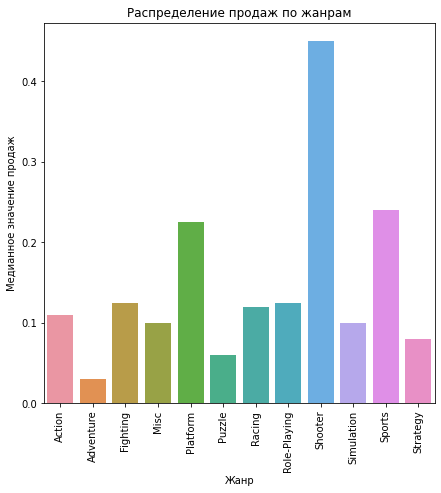

In [132]:
genre = (df
         .pivot_table(index='genre', values='region_sum', aggfunc='median')
)

plt.figure(figsize=(7,7))
sns.barplot(x=genre.index, y=genre['region_sum'])
plt.title('Распределение продаж по жанрам')
plt.xlabel('Жанр')
plt.xticks(rotation = 90)
plt.ylabel('Медианное значение продаж')
plt.show()

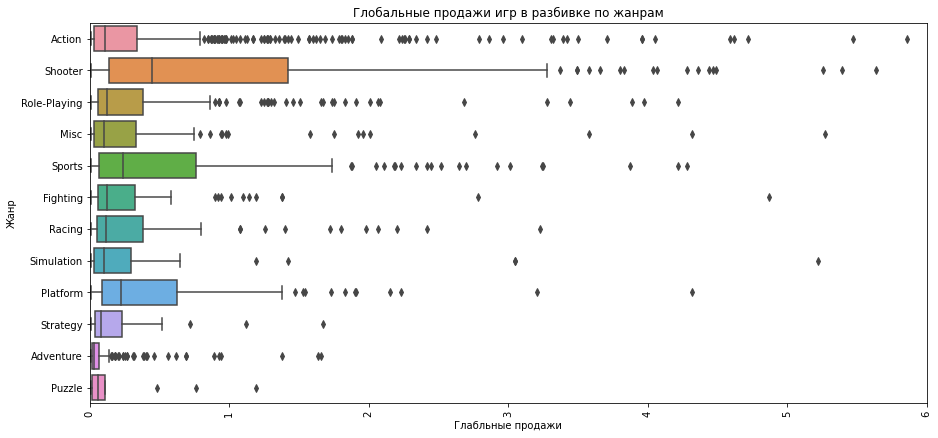

In [133]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x=df['region_sum'], y=df['genre'])
plt.title('Глобальные продажи игр в разбивке по жанрам')
plt.xlabel('Глабльные продажи')
plt.xticks(rotation = 90)
plt.xlim(0,6)
plt.ylabel('Жанр')
plt.show()

**Вывод:** Больше всего игр выпускается в жанре action, role-playing, adventure. Чуть меньше – в жанре sooter и sports. Меньше всего игр выпускается в жанре puzzle. Самыми прибыльными являются жанры shooter, sports, platform. Action, fighting и racing чуть менее прибыльные. Самые низкие медианные продажи у игр в жанре adventure.

## Портрет пользователя из каждого региона

Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). Для этого посчитаем сумму продаж игр на каждой платформы в трёх регионах.

In [134]:
top_platforms = (df
                 .pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
)

display(top_platforms.head())

,eu_sales,jp_sales,na_sales
platform,,,
3DS,30.96,67.81,38.20
DS,0.85,0.00,0.57
PC,25.36,0.00,11.11
PS3,67.81,23.35,63.50
PS4,141.09,15.96,108.74


Для того, чтобы сравнить самые популярные платформы по регионам, посчитаем долю продаж, которая приходится на каждую платформу в каждом регионе.

In [135]:
top_platforms['eu_share'] = top_platforms['eu_sales']*100/sum(top_platforms['eu_sales'])
top_platforms['na_share'] = top_platforms['na_sales']*100/sum(top_platforms['na_sales'])
top_platforms['jp_share'] = top_platforms['jp_sales']*100/sum(top_platforms['jp_sales'])

Выведем на экран топ-5 продаж в каждом регионе.

In [123]:
display(top_platforms.sort_values(by='eu_share', ascending=False).head()['eu_share'])

platform
PS4     35.971241
PS3     17.288326
XOne    13.152997
X360    10.840578
3DS      7.893328
Name: eu_share, dtype: float64

In [124]:
display(top_platforms.sort_values(by='jp_share', ascending=False).head()['jp_share'])

platform
3DS     48.167353
PS3     16.586163
PSV     13.205001
PS4     11.336838
WiiU     7.728371
Name: jp_share, dtype: float64

In [125]:
display(top_platforms.sort_values(by='na_share', ascending=False).head()['na_share'])

platform
PS4     24.842933
XOne    21.274360
X360    18.656188
PS3     14.507322
3DS      8.727239
Name: na_share, dtype: float64

**Вывод:** Самые популярные платформы (по доле проданных игр) в Европе – это PS4, PS3, XOne, X360 и 3DS; в Японии – 3DS, PS3, PSV, PS4 и WiiU; в Северной Америке – PS4, XOne, X360, PS3, 3DS. PS3 входит в топ рейтинга как в Европе (17.3% продаж), так и в Японии (16.5%), и в Америке (14.5%). Также во всех регионах популярны платформы PS4 (в Европе – 35.97%, в Японии – 11.3%, в Америке – 24.8%) и 3DS (в Европе – 7.89%, в Японии – 48.2%, в Америке – 8.7%). Эти же платформы вышли в топ, когда мы рассматривали глобальные продажи по платформам.

Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5).

In [136]:
top_genres = (df
              .pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
)

display(top_genres.head())

,eu_sales,jp_sales,na_sales
genre,,,
Action,118.13,40.49,126.05
Adventure,8.25,5.82,7.14
Fighting,8.55,7.65,15.55
Misc,20.04,9.20,27.49
Platform,15.58,4.79,18.14


In [137]:
top_genres['eu_share'] = top_genres['eu_sales']*100/sum(top_genres['eu_sales'])
top_genres['na_share'] = top_genres['na_sales']*100/sum(top_genres['na_sales'])
top_genres['jp_share'] = top_genres['jp_sales']*100/sum(top_genres['jp_sales'])

In [128]:
display(top_genres.sort_values(by='eu_share', ascending=False).head()['eu_share'])

genre
Action          30.117533
Shooter         22.400122
Sports          15.429722
Role-Playing     9.425592
Racing           5.147490
Name: eu_share, dtype: float64

In [129]:
display(top_genres.sort_values(by='jp_share', ascending=False).head()['jp_share'])

genre
Role-Playing    36.255150
Action          28.761188
Misc             6.535019
Fighting         5.434011
Shooter          4.695269
Name: jp_share, dtype: float64

In [130]:
display(top_genres.sort_values(by='na_share', ascending=False).head()['na_share'])

genre
Action          28.797606
Shooter         25.071394
Sports          14.911700
Role-Playing    10.600626
Misc             6.280414
Name: na_share, dtype: float64

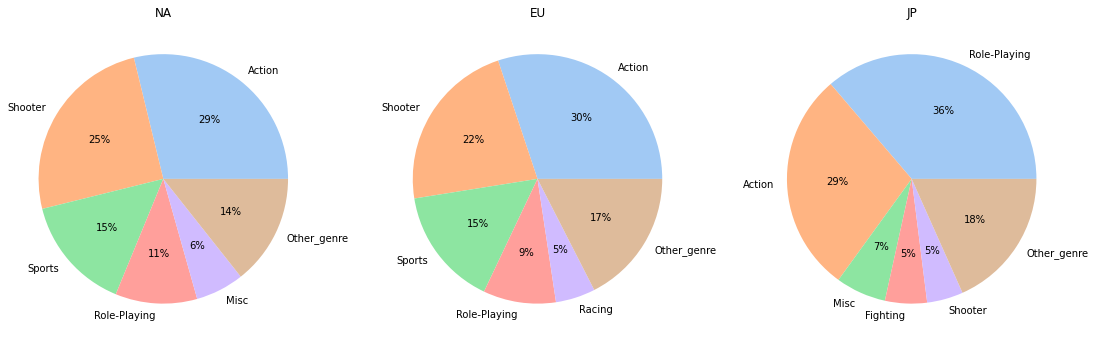

In [138]:
colors = sns.color_palette('pastel')[0:6]
countries = df.columns[4:7]

fig, axs = plt.subplots(1, 3, figsize=(19,20))
axs = axs.ravel()

for i in range(len(countries)):
    ax = axs[i]
    df_i = (df.groupby('genre')[countries[i]].sum()
            .reset_index()
            .sort_values(countries[i], ascending = False, ignore_index = True)
            .head(5))
    df_i = df_i.append({'genre': 'Other_genre', countries[i]: df[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
    ax.pie(df_i[countries[i]], labels = df_i['genre'], colors = colors, autopct='%.0f%%')
    ax.set_title(df_i.columns[1].split('_')[0].upper())

**Вывод:** Самые популярные жанры в Европе – Action, Shooter, Sports, Role-Playing и Racing; в Японии – Role-Playing, Action, Music, Fighting и Shooter; в Северной Америке – Action, Shooter, Sports, Music и Role-Playing. Во всех трёх регионах популярны жанры Action, Shooter и Role-Playing.

Определим для пользователя каждого региона (NA, EU, JP), влияет ли рейтинг ESRB на продажи в отдельном регионе. Для этого посмотрим на корелляцию между значением рейтинга и продажами в Европе, Японии и Северной Америке. Чтобы посчитать корелляюцию, заменим категориальные значения из столбца `rating` на порядковые. Для этого напишем функцию и применим её к нужному столбцу.

In [139]:
def rating_to_num(series):
    if series == 'unknown':
        return 0
    elif series == 'RP':
        return 1
    elif series == 'EC':
        return 2
    elif series == 'E':
        return 3
    elif series == 'E10+':
        return 4
    elif series == 'T':
        return 5
    elif series == 'M':
        return 6

df['rating_num'] = df['rating'].apply(rating_to_num)
display(df[['rating', 'rating_num']].head(10))

,rating,rating_num
16,M,6
23,M,6
31,unknown,0
33,unknown,0
42,M,6
47,unknown,0
60,M,6
69,M,6
72,unknown,0
77,E,3


Теперь рассчитаем корелляцию и построим графики. Мы видим, что в Японии взаимосвязь между рейтингом ESRB и продажами отсуствует (коэффициент корелляции очень мал и равен -0.09). Низкий коэффециент корелляции может быть связан с тем, что для Японии для многих игр отсутсвует значение рейтинга (т.е. он принимает значение 'unknown'). В Европе и Северной Америке взаимосвязь между продажами и возрастным рейтингом очень слабая, но есть (коэффециенты корелляции 0.17 и 0.19 соответсвенно), характер взаимосвязи – положительный. Если учитывать, что чем старше аудитория игры, тем выше порядковое значение, которое было присвоено рейтингу, можно подытожить, что с увеличением возрастного рейтинга растут и продажи.

In [140]:
print('Корелляция между значением рейтинга и продажами в Европе:', df['rating_num'].corr(df['eu_sales']))
print('Корелляция между значением рейтинга и продажами в Японии:', df['rating_num'].corr(df['jp_sales']))
print('Корелляция между значением рейтинга и продажами в Северной Америке:', df['rating_num'].corr(df['na_sales']))

Корелляция между значением рейтинга и продажами в Европе: 0.17349439418561485
Корелляция между значением рейтинга и продажами в Японии: -0.08510877945042583
Корелляция между значением рейтинга и продажами в Северной Америке: 0.18702852926427438


В Европе больше всего продаж с рейтингом "Для взрослых" и "Для всех", значительно меньше продаж игр для подростков и детей.

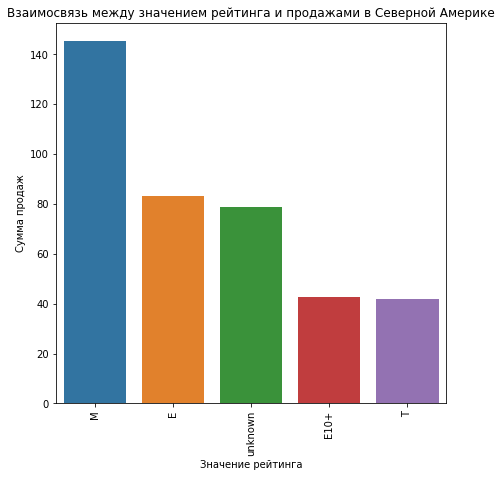

In [141]:
slaes_eu = (df
            .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
            .sort_values(by='eu_sales', ascending=False)
)

plt.figure(figsize=(7,7))
sns.barplot(x=slaes_eu.index, y=slaes_eu['eu_sales'])
plt.title('Взаимосвязь между значением рейтинга и продажами в Северной Америке')
plt.xlabel('Значение рейтинга')
plt.xticks(rotation = 90)
plt.ylabel('Сумма продаж')
plt.show()

В Японии также больше всего продаж у игр с рейтингом "Для подростков", "Для всех", и "Для взрослых" – в порядке убывания продаж. 

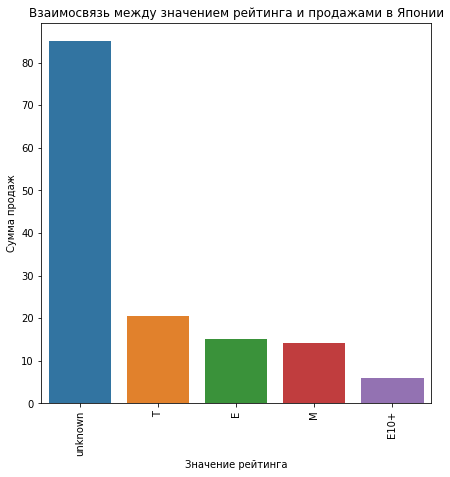

In [142]:
slaes_jp = (df
            .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
            .sort_values(by='jp_sales', ascending=False)
)

plt.figure(figsize=(7,7))
sns.barplot(x=slaes_jp.index, y=slaes_jp['jp_sales'])
plt.title('Взаимосвязь между значением рейтинга и продажами в Японии')
plt.xlabel('Значение рейтинга')
plt.xticks(rotation = 90)
plt.ylabel('Сумма продаж')
plt.show()

В Северной Америке наблюдается аналогичная ситуация: больше всего продаж у игр с рейтингом M (для взрослых), E (для всех) и T (для подростков).

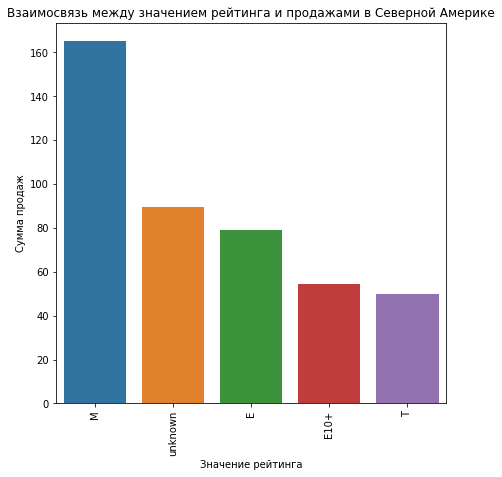

In [143]:
slaes_na = (df
            .pivot_table(index='rating', values='na_sales', aggfunc='sum')
            .sort_values(by='na_sales', ascending=False)
)

plt.figure(figsize=(7,7))
sns.barplot(x=slaes_na.index, y=slaes_na['na_sales'])
plt.title('Взаимосвязь между значением рейтинга и продажами в Северной Америке')
plt.xlabel('Значение рейтинга')
plt.xticks(rotation = 90)
plt.ylabel('Сумма продаж')
plt.show()

**Вывод:** Таким образом, взаимосвязь между рейтингом и количеством продаж есть, но она слабая. Во всех трёх регионах больше всего продаж у игр с рейтингом "Для всех" (Е), "Для взрослых" (М) и "Для подростков" (Т).

## Проверка гипотез

Для проверки гипотез надо отфильтровать отрицательные значения рейтинга.

In [145]:
df = df.query('user_score > 0').copy()

Проверим предположение о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Для этого сформулируем нулевую и альтернативную гипотезы:

* H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые (равны)

* H1: Средние пользовательские рейтинги платформ Xbox One и PC разные 


Зададим пороговое значение alpha, равное 0.05 – критический уровень проверки p-value. В случае если p-value меньше 0.05, вероятность наблюдать полученное значение статистики или более экспремальное при условии, что нулевая гипотеза верна, крайне мала. В таком случае мы можем отбросить нулевую гипотезу в пользу альтернативной.

In [146]:
results = stats.ttest_ind(df.loc[df['platform'] == 'XOne', 'user_score'], df.loc[df['platform'] == 'PC', 'user_score'])

alpha = 0.05

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


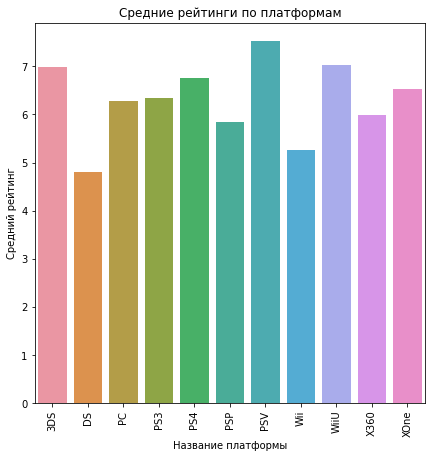

In [147]:
platform = (df
          .pivot_table(index='platform', values='user_score', aggfunc='mean')
)

plt.figure(figsize=(7,7))
sns.barplot(x=platform.index, y=platform['user_score'])
plt.title('Средние рейтинги по платформам')
plt.xlabel('Название платформы')
plt.xticks(rotation = 90)
plt.ylabel('Средний рейтинг')
plt.show()

**Вывод:** Мы проверили двухстороннюю гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, т.е. равны (наша H0). Поскольку это двухсторонний тест, альтернативная гипотеза была сформулирована в терминах отрицания равенства. По результатам теста p-value равно 0.14, значит, вероятность наблюдать статистику t-теста при условии, что H0 верна – велика. Не удалось опровергнуть нулевую гипотезу о том, что средние пользовательсвкие рейтинги платформ Xbox One и PC одинаковые, поэтому мы её принимаем.

Проверим предположение о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные:

* H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые (равны)

* H1: Средние пользовательские рейтинги жанров Action и Sports разные

Вновь зададим пороговое значение alpha равное 0.01 – критический уровень проверки p-value.

In [148]:
results = stats.ttest_ind(df.loc[df['genre'] == 'Action', 'user_score'], df.loc[df['genre'] == 'Sports', 'user_score'])

alpha = 0.01

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  1.0517832389140023e-27
Отвергаем нулевую гипотезу.


**Вывод:** Как и при проверке предыдущей гипотезы мы использовали двухсторонний тест. Поэтому была сформулирована нулевая гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые, а альтернативная гипотеза в терминах неравенства. После проверки гипотезы мы получили p-value < 0.01, поэтому мы отбрасываем гипотезу о равенстве пользовательских рейтингов жанров Action и Sports в пользу альтернативы.

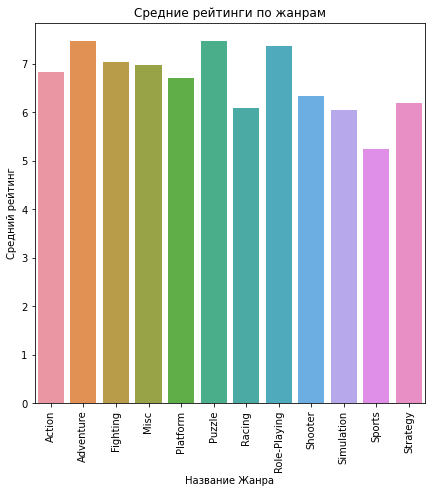

In [149]:
genres = (df
          .pivot_table(index='genre', values='user_score', aggfunc='mean')
)

plt.figure(figsize=(7,7))
sns.barplot(x=genres.index, y=genres['user_score'])
plt.title('Средние рейтинги по жанрам')
plt.xlabel('Название Жанра')
plt.xticks(rotation = 90)
plt.ylabel('Средний рейтинг')
plt.show()

## Вывод

На этапе подготовки данных были изменены названия столбцов, тип данных переменных "год выпуска" и "оценка пользователей". Была проведена проверка на наличие дубликатов. Затем были заполнены пропуски в переменных "имя", "жанр", "оценка критиков", "оценка пользователей", "рейтинг ESRB". Также была проведена проверка на наличие выбросов в данных.

На этапе исследовательского анализа данных было изучено количество релизов за каждый год, а также глобальные продажи по платформам. Были выявлены платформы с наибольшими продажами (DS, PS-PS3, Wii, X360). Также был выявлен период, на протяжении которого платформы пользуются популярностью (игры на них хорошо продаются) – это 9-10 лет. Поэтому было принято решение в исследовании изучать данные за последние 5 лет с 2012 до 2016 гг. В качестве потенциально прибыльных платформ выделить их обновленные версии: PS4, XOne и 3DS.

Далее была проанализирована взаимосвязь между отзывами критиков и пользователей и продажами на каждой из трёж платформ. Была выявлена положительная корелляция между отзывами критиков и продажами (для всех трёх платформ), а также выявлена положительная корелляция между отзывами пользователей и продажами игр на платформе WiiU. Стоит отметить, кто корелляция между этими факторами слабая (коэффициент корелляции Пирсона принимает значение до 0,5). Поэтому объяснительный потенциал у факторов небольшой. Также была изучена взаимосвязь между жанрами и глобальными продажами. Больше всего игр выпускается в жанре action, role-playing, advebture, sports. Из них только игры в жанре sports прибыльные. Меньше игр выпускается в жанре shooter и platform, но эти жанры также являются прибыльными (игры в жанре shooter самые прибыльные среди всех жанров). Самые низкие продажи у игр в жанре adventure.

Далее были составлены портреты пользователей из Европы, Северной Америки и Японии. Во всех регионах популярны платформы PS3, PS4 и 3DS. Самая популярная платформа Европе – это PS4, в Японии – 3DS, в Северной Америке – PS4. Относительно жанров, во всех трёх регионах популярны жанры Action, Shooter и Role-Playing. Наконец, по регионам больше всего продаж у игр с рейтингом "Для всех" (Е), "Для взрослых" (М) и "Для подростков" (Т).

Далее были проверены предположения о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые и что средние пользовательские рейтинги жанров Action и Sports разные. Предположение о равенстве рейтингов платформ Xbox One и PC не подтвердилось (была отброшена в пользу альтернативной). Предположение о разнице пользовательских рейтингов жанров Action и Sports не было опровергнуто.

Таким образом, успешность продаж игры может определяться площадкой, на которой она выходит, отзывами критиков и рейтингом среди пользователей, жанром игры, а также её рейтингом ESRB.

**Вывод:** Стоит обратить внимание на платформы PS4, XOne и 3DS, так как это обновленные версии платформ, пользовавшихся популярностью в последние 10 лет. Продажи игр на них хотя и сокращаются, но остаются на хорошем уровне. Во всех трёх изученных регионах популярны платформы PS4 и 3DS, поэтому если выходить на широкий рынок, то на этих платформах.

Из жанров стоит сфокусироваться на играх в стиле shooter и sports, которые являются более прибыльными по сравнению с другими. Кроме того, игр в этом жанре выпускается не очень много, поэтому конкуренция должна быть небольшой.

Рекомендуется обратить внимание на игры с рейтингом "Для всех" (Е) и "Для взрослых" (М), поскольку они популярны в каждом из регионов.

При выборе платформы и жанра можно ориентироваться на оценки критиков, так как взаимосвязь между продадажами и оценками экспертов положительная. Не стоит ориентиоваться на оценку пользователей – её взаимосвязь с продажами хоть и положительная, но зачастую очень слабая (а для некоторых платформ и вовсе отсутсвует).